# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import scipy.stats as stats
import statsmodels as smods
import seaborn as sns
import matplotlib as plt
%matplotlib inline

### 1. Is the distribution of body temperatures normal? 

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


#### Normal tests on temperature

In [5]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [6]:
stats.anderson(df.temperature, dist='norm')

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [7]:
stats.kurtosistest(df.temperature)

KurtosistestResult(statistic=1.6441851280847679, pvalue=0.10013796794683075)

In [8]:
stats.skewtest(df.temperature)

SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815)

#### Normal tests on log temperature

In [9]:
stats.normaltest(np.log(df.temperature))

NormaltestResult(statistic=2.5867689985068765, pvalue=0.27434070414346634)

In [10]:
stats.anderson(np.log(df.temperature), dist='norm')

AndersonResult(statistic=0.53811901672412432, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

 * The results indicate that the sample data is not normally distributed.  The p-value of the test statistic exceeds 15%, and the results from the skew test indicate that the data is not normally skewed.
 * However, those results apply to the sample, and the sample size was relatively small (130 observations).  The underlying population is likely normally distributed.
 * An EDA distrubution plot of the sample exhibits a bell curve shape, indicating the underlying population may be normally distributed.

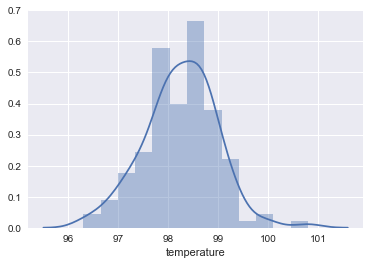

In [11]:
sns.distplot(df.temperature)

### 2. Is the sample size large? Are the observations independent?

In [12]:
df.shape

(130, 3)

* There are 130 observations in the sample size, which is adequate for a test of normality, and the abstract indicates that the observations were a random sample, so likely independent.

### 3. Is the true population mean really 98.6 degrees F?

#### Z-test

In [13]:
temp_mean = df.temperature.mean()
temp_mean

98.24923076923078

In [14]:
z_stat = (temp_mean - 98.6) / stats.sem(df.temperature)
z_stat

-5.4548232923640771

In [15]:
stats.norm.cdf(z_stat)

2.451078507056712e-08

In [16]:
crit_value = stats.norm.ppf(0.025)
crit_value

-1.9599639845400545

* Since the z_stat test statistic i.e. -5.45 is less than the two-tailed critcal value of -1.96, the null hypothesis that the population mean body temperature being 98.6 degrees can be rejected.

#### T-test

In [17]:
stats.ttest_1samp(df.temperature, popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

* Similarly, the t-stat's p-value is well below the the two-tailed p-value of 0.025, also indicating the population mean temperature being 98.6 degrees can be rejected.
* While it may be more appropriate to use the T-test given that the population standard deviation is unknown, both tests arrive at the same result: rejecting the null hypothesis.

### 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [18]:
conf_int = stats.norm.interval(0.95, loc=temp_mean, scale=np.std(df.temperature) / np.sqrt(len(df.temperature)))
conf_int

(98.123682111456645, 98.37477942700491)

* For this sample, the 95% C.I. is 98.12 degrees - 98.37 degrees, and body temperatures outside of this range would be considered 'abnormal.'

### 5. Is there a significant difference between males and females in normal temperature?

In [19]:
df_m = df[df.gender == 'M']
df_f = df[df.gender == 'F']
temp_mean_m = df_m.temperature.mean()
temp_mean_f = df_f.temperature.mean()
temp_mean_m, temp_mean_f

(98.1046153846154, 98.39384615384613)

In [20]:
stats.ttest_ind(a=df_m.temperature, b=df_f.temperature, equal_var=True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

* Assuming that both male and female body temp variances are equal in the underlying population, the T-test for the means of two independent samples has a test statistic of -2.29 and a p-value below 2.5% for a two-tailed test.
* This indicates that the null hypothesis (no gender difference in body temperature) can be rejected, and that we're 95% confident that mean female body temp is higher than mean male body temp.